In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
import statistics
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def draw_list(data, ax, y_offset=0, rect_height=0.5, plot_title=""):
    n = len(data)
    rect_width = 1.0 / n

    # BW colormap
    black = "#000000" 
    white = "#ffffff"  
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [black, white])


    
    for i, value in enumerate(data):
        normalized_val = (value - 46) / (60 - 46)
        # normalized_val = (value - min(data)) / (max(data) - min(data))
        color = custom_cmap(normalized_val)
        rect = patches.Rectangle((i * rect_width, y_offset), rect_width, rect_height, color=color)
        ax.add_patch(rect)
    
    # Set the axes limits and hide ticks.
    ax.set_xlim(0, 1)
    ax.set_title(plot_title) 
    ax.set_ylim(y_offset, y_offset + rect_height)
    ax.axis('off')



In [2]:
first_tenor = {
    "Reference": [60,60,59,59,60,60,61,61,61,61,61,61,60,60,59,59,60,60,56,56,56,59,59,59,60,60,60,60,60,60,60,60,60,60,59,59,60,60,61,61,61,61,61,61,60,60,59,59,60,60,56,56,56,59,60,60,60,60,60,60,60,60,60,60,63,63,63,63,63,63,65,65,65,65,65,65,60,60,60,60,63,63,63,63,63,59,59,59,61,61,61,61,61,61,61,61,61,61,60,60,59,59,60,60,60,60,60,60,56,56,56,56,59,59,59,59,60,60,60,60,60,60,60,60,60,60,60,60,63,63,63,63,63,63,65,65,65,65,65,65,60,60,60,60,63,63,63,63,63,59,59,59,61,61,61,61,61,61,61,61,61,61,60,60,59,59,60,60,60,60,60,60,56,56,56,56,59,59,59,59,59,56,56,56,56,56,56,56,56,56,56,56],
    "Tenor 1 HPS4": [36,60,48,58,60,60,48,61,61,61,61,61,61,60,60,58,45,60,36,44,56,43,58,58,58,60,60,60,60,60,60,60,60,60,60,60,60,58,60,60,43,61,61,61,61,61,61,60,44,58,60,60,43,56,56,56,58,60,60,60,60,60,60,60,40,40,40,40,63,63,63,63,63,63,63,66,65,65,65,65,65,36,60,60,60,60,63,44,63,63,50,58,58,58,61,61,61,61,61,61,61,61,61,61,61,61,60,60,58,58,37,60,60,60,60,60,47,56,56,56,56,58,58,58,58,58,60,60,60,60,60,60,60,60,60,60,48,48,48,48,63,63,63,63,63,63,63,65,65,65,65,65,65,60,60,60,44,63,63,63,63,63,58,58,58,58,61,61,61,61,61,61,61,61,61,61,61,61,60,60,58,58,60,60,60,60,60,60,56,56,56,55,56,56,58,58,58,58,58,58,55,56,56,56,56,56,56,56,56,56,56,56,45,45],
    "Tenor 1 HPS5": [36,60,44,58,60,60,48,61,61,61,61,61,61,36,60,58,45,60,60,56,56,56,58,58,58,60,60,60,60,60,60,60,60,60,60,60,60,58,60,60,39,39,61,61,61,61,61,60,60,58,37,60,43,56,56,56,58,60,60,60,60,60,60,60,60,60,60,60,60,63,63,63,63,63,63,65,65,65,65,77,65,65,60,60,60,60,63,36,63,63,63,58,58,58,61,61,61,61,61,61,61,61,61,61,61,61,60,60,58,58,37,60,60,60,60,60,60,56,56,56,56,58,58,58,58,58,60,60,60,60,60,60,60,60,60,60,48,48,48,48,63,63,63,63,63,63,66,65,65,65,65,65,65,60,60,60,40,63,63,63,63,63,58,58,58,61,61,61,61,61,61,61,61,61,61,61,61,60,60,58,58,60,60,60,60,60,60,60,56,56,43,56,56,58,58,46,58,58,58,58,56,56,56,56,56,56,56,56,56,56,56,56,56],
    "Tenor 1 HPS6": [44,58,60,60,36,61,61,61,61,61,61,61,60,58,38,60,60,37,56,56,58,58,58,60,60,60,60,60,60,60,60,60,60,60,60,58,60,60,60,61,73,73,61,61,61,60,44,58,60,60,56,56,56,58,58,60,60,60,60,60,60,60,60,60,60,60,63,63,63,63,63,63,44,66,65,65,65,65,53,53,60,60,60,63,63,44,63,63,36,39,58,58,61,61,61,61,61,61,61,61,61,61,61,61,60,60,58,58,58,60,60,41,60,60,39,68,56,56,56,58,39,58,58,58,60,40,60,60,60,60,60,60,60,48,48,48,48,48,63,63,63,63,63,63,44,65,65,65,65,65,65,60,60,60,37,63,63,63,63,63,58,58,58,61,61,61,61,61,61,61,61,61,61,61,49,61,60,60,58,58,60,60,60,60,60,60,56,56,56,44,44,46,46,46,46,46,58,39,39,56,56,56,56,56,56,56,56,56,56,56,56]
}

second_tenor = {
    "Reference":[56,56,55,55,56,56,55,55,55,55,55,55,56,56,55,55,56,56,56,56,56,55,55,55,56,56,56,56,56,56,55,55,56,56,55,55,55,55,55,55,56,56,55,55,56,56,56,56,55,56,56,56,56,56,56,56,56,56,56,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,56,56,56,56,56,55,55,55,58,58,58,58,58,58,58,58,58,58,57,57,58,58,56,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,56,56,56,56,56,55,55,55,59,59,59,59,59,59,59,59,59,59,57,57,59,59,56,56,56,56,56,56,56,56,56,56,56,56,55,55,55,51,51,51,51,51,51,51,51,51,51,51],
    "Tenor 2 HPS4" : [56,56,55,55,56,56,55,55,55,55,55,55,56,56,55,55,56,56,56,56,56,55,55,55,56,56,56,56,56,56,44,44,44,44,56,56,55,56,56,36,55,55,55,55,55,55,56,56,55,45,56,56,56,56,56,55,56,56,56,56,56,56,56,56,56,56,56,40,60,60,60,60,60,60,60,60,60,60,60,53,60,60,60,60,56,56,44,56,56,55,55,55,58,58,58,58,58,58,46,46,46,46,58,58,57,57,58,58,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,60,60,60,60,60,48,60,60,60,60,60,60,60,60,60,60,44,56,56,56,56,55,55,55,55,58,58,58,58,58,58,58,58,58,58,58,58,57,57,58,58,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,51,50,51,51,51,51,51,51,51,51,51,51,51,51],
    "Tenor 2 HPS5" : [44,56,56,55,55,56,56,55,55,43,55,55,55,56,56,55,55,56,56,56,56,56,55,55,55,56,56,56,56,56,56,44,44,44,44,56,56,55,56,56,56,55,55,55,55,55,56,56,56,55,56,56,56,56,56,56,55,56,56,56,56,56,56,56,56,56,56,56,56,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,36,56,45,56,56,55,55,55,55,58,58,58,58,58,58,58,58,58,58,58,57,57,57,58,58,56,56,56,56,44,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,36,56,56,56,56,56,55,55,55,58,58,58,58,58,58,58,58,58,58,58,58,57,44,58,58,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,51,51,51,51,51,51,51,51,51,51,51,38,38,38],
    "Tenor 2 HPS6" : [44,56,43,55,56,56,55,55,43,55,55,55,56,44,55,55,56,56,56,56,56,55,55,55,56,56,56,56,56,56,56,56,56,56,56,56,55,44,56,56,43,55,43,43,36,43,56,56,55,37,56,56,56,56,56,55,56,56,56,56,56,56,56,44,44,44,44,44,60,60,60,60,60,48,60,60,60,60,60,60,41,60,60,60,36,56,44,56,56,44,55,55,55,58,58,58,58,58,58,46,46,46,46,58,57,57,46,58,37,44,44,37,44,44,56,56,44,56,56,56,43,55,55,55,55,55,55,55,55,55,55,55,55,55,43,43,43,43,43,60,60,60,60,60,48,60,60,60,60,60,41,60,60,41,41,56,56,56,56,56,55,55,55,58,58,58,58,58,58,58,58,58,58,40,39,57,57,38,58,38,56,56,56,56,56,56,56,56,56,44,44,44,56,56,43,36,55,55,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51],
}

first_bass = {
    "Reference": [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 53, 53, 53, 49, 49, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 53, 53, 53, 49, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,  56, 56,  56, 56,  56, 56, 56, 51, 51, 51, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 51, 51, 53, 53, 51, 51, 51, 51, 51, 51, 51, 51, 53, 53, 53, 53, 53, 53, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,  56, 56, 56, 56, 56, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 51, 51, 53, 53, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48],
    "Bass 1 HPS4": [51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,50,51,51,53,53,41,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,53,53,53,53,49,51,51,51,51,51,51,51,51,40,40,40,56,56,56,56,56,56,44,56,56,56,56,56,56,45,56,57,44,44,56,56,56,56,44,51,51,51,53,53,53,53,53,53,53,53,53,53,53,53,51,51,53,53,39,51,51,51,51,51,51,51,51,53,53,53,53,53,53,53,52,52,52,52,52,52,52,52,52,52,40,40,40,40,56,56,56,56,56,56,44,56,44,44,44,56,44,56,56,56,56,56,56,56,56,56,51,51,51,53,53,53,53,53,53,53,53,53,53,54,53,51,50,53,53,40,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,48,48,48,48,48,48,48,48,48,48,48,48],
    "Bass 1 HPS5": [51,51,51,39,51,51,51,51,51,51,51,51,51,39,51,51,51,39,53,53,37,49,49,49,36,51,51,51,51,51,52,52,52,52,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,53,53,53,49,51,51,51,51,51,51,51,51,39,39,39,39,56,56,56,56,56,44,56,56,56,56,56,56,45,56,56,57,44,56,56,56,56,44,51,51,51,53,53,53,53,53,53,53,53,53,53,53,53,51,51,53,53,39,51,51,51,51,51,51,51,51,53,53,53,53,53,53,53,52,52,41,52,52,52,52,52,52,52,52,52,52,52,52,56,56,56,56,56,45,56,56,44,44,44,56,56,56,56,56,56,56,57,56,56,51,50,51,51,53,53,53,53,53,53,53,53,53,53,53,53,51,51,53,53,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,39,47,48,48,48,48,48,48,48,48,48,48,48,48],
    "Bass 1 HPS6": [40,51,39,39,39,51,51,39,39,51,39,39,51,51,39,51,39,51,39,53,53,53,49,49,49,36,51,51,51,51,51,39,39,39,39,51,51,51,51,51,39,51,51,51,51,51,51,51,51,51,39,51,51,53,53,41,49,51,51,51,51,51,51,51,39,39,39,39,56,56,56,56,56,56,56,56,56,56,56,56,44,38,56,56,37,44,56,57,56,56,38,51,51,39,53,53,53,53,53,53,53,53,53,53,53,53,51,53,53,39,39,39,39,39,51,51,51,39,53,53,53,41,53,41,53,52,52,41,52,52,52,52,52,52,52,40,40,40,40,40,56,56,56,56,56,44,44,37,44,44,44,56,56,56,56,44,44,56,45,56,56,56,51,51,39,53,53,53,53,53,53,53,53,53,53,41,53,51,51,53,53,51,39,39,51,39,51,51,51,51,51,51,51,51,51,51,39,51,51,39,47,48,48,48,48,48,48,48,48,48,48,36],
}

second_bass = {
    "Reference": [51, 51, 49, 49, 48, 48, 46, 46, 46, 46, 46, 46, 44, 44, 49, 49, 48, 48, 49, 49, 49, 46, 46, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 49, 49, 48, 48, 46, 46, 46, 46, 46, 46, 44, 44, 49, 49, 48, 48, 49, 49, 49, 46, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 56, 56, 56, 56, 55, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 48, 48, 48, 48, 48, 51, 51, 51, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 49, 49, 51, 51, 51, 51, 51, 51, 48, 48, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 56, 56, 56, 56, 55, 55, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 48, 48, 48, 48, 48, 51, 51, 51, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 48, 48, 49, 49, 51, 51, 51, 51, 51, 51, 48, 48, 48, 48, 51, 51, 51, 51, 51, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44],
    "Bass 2 HPS4": [41,51,51,49,48,48,47,46,46,46,46,46,46,44,44,49,49,48,49,49,49,49,45,45,45,56,44,56,56,56,44,44,44,44,45,56,44,49,48,48,46,46,46,46,46,46,46,56,49,49,48,48,49,49,49,49,46,44,44,44,56,56,44,44,44,44,44,44,56,56,56,56,55,55,52,53,53,53,53,53,53,53,53,53,53,48,48,48,48,48,51,51,51,46,46,46,46,46,46,46,46,46,46,45,46,45,48,49,49,52,51,51,51,51,51,51,48,48,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,48,48,36,36,36,56,56,56,56,55,55,53,53,53,53,53,53,53,53,53,53,48,48,48,48,48,48,51,51,51,46,58,46,46,58,46,58,58,58,58,46,46,60,47,49,49,51,51,51,51,51,51,48,47,47,48,48,48,51,51,51,51,51,51,51,44,44,56,56,56,56,44,56,56,56,44],
    "Bass 2 HPS5": [51,51,49,48,48,48,46,46,46,46,46,46,44,44,49,48,47,48,49,49,49,45,45,45,56,44,56,56,56,44,44,44,44,45,44,49,49,48,48,46,46,46,46,46,46,46,44,49,49,48,48,49,49,49,46,44,44,44,44,44,44,44,44,44,44,44,44,56,56,56,56,55,55,53,53,53,53,65,53,53,53,53,53,53,47,48,48,48,48,51,51,51,51,46,46,46,46,46,46,46,46,46,45,45,45,48,49,49,52,51,51,51,51,51,51,48,48,49,49,49,49,49,49,49,47,48,48,48,48,48,48,48,48,48,48,36,36,36,36,56,56,56,56,55,55,53,53,53,53,53,53,53,53,53,53,48,48,48,48,48,51,51,51,51,46,46,46,46,58,46,58,58,58,45,46,46,47,47,49,49,51,51,51,51,51,47,48,48,48,48,48,51,51,51,51,51,51,51,44,44,44,56,56,56,44,56,56,56,56,44,44,44],
    "Bass 2 HPS6": [39,51,37,48,48,36,46,46,46,46,46,46,44,44,49,49,47,48,49,49,49,45,45,45,44,44,44,56,56,44,44,44,44,44,44,44,49,47,48,46,46,46,46,46,46,46,44,49,49,48,48,49,49,49,49,46,44,44,44,44,44,44,44,44,44,44,44,56,56,56,56,56,55,55,53,53,53,65,65,53,53,53,40,53,47,48,48,48,48,48,51,51,51,46,46,46,46,46,46,46,46,46,46,45,46,47,48,61,49,51,51,51,63,63,51,47,48,48,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,48,36,36,36,36,56,56,56,56,55,55,65,53,53,53,53,53,53,53,53,53,48,48,48,48,48,51,51,51,51,46,46,46,46,58,46,46,46,46,46,46,46,47,47,49,49,51,39,51,51,51,51,48,48,48,48,48,48,51,51,51,51,51,51,51,44,44,56,56,56,44,56,44,56,56,44,44,44,44,44],
}

Reference error 0.0
Tenor 1 HPS4 error 434.0
Tenor 1 HPS5 error 352.0
Tenor 1 HPS6 error 591.0


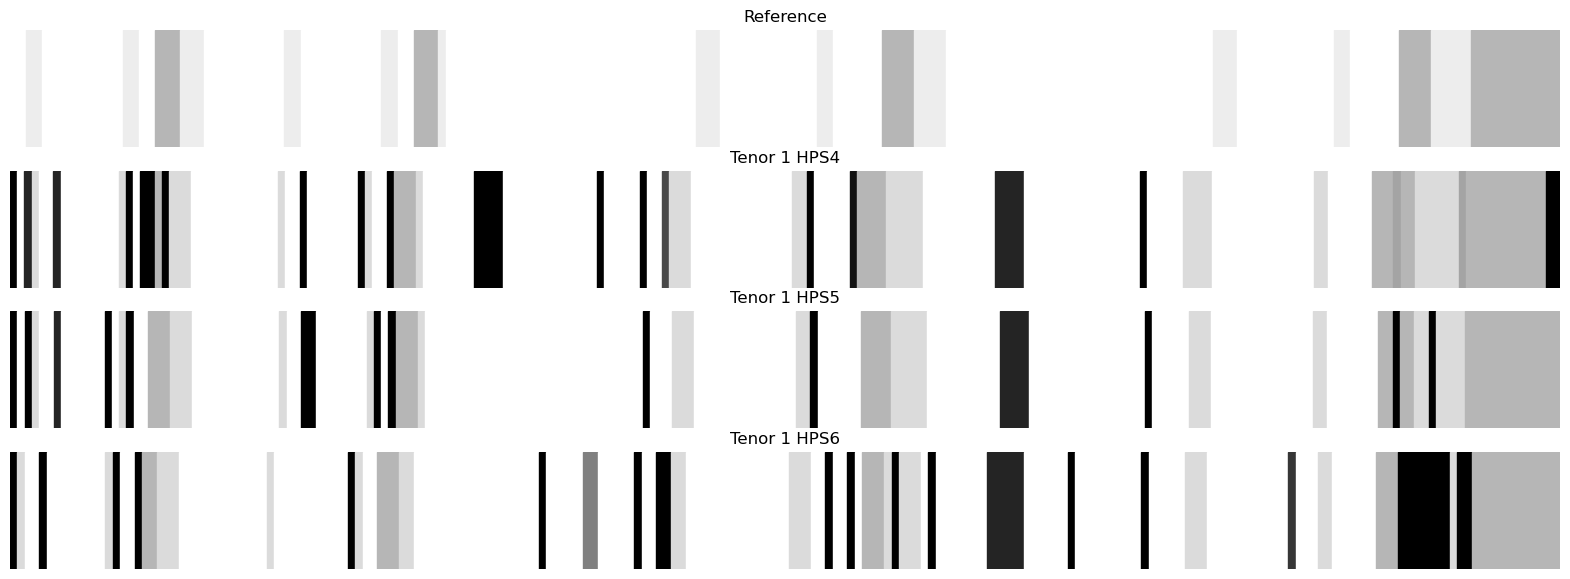

In [3]:
# First tenor.
series = first_tenor

fig, axes = plt.subplots(len(series), 1, figsize=(20, 7))

for (ax, (key, list)) in zip(axes, series.items()):
    draw_list(list, ax, y_offset=0, rect_height=1, plot_title=key)
    distance, _ = fastdtw(list, series["Reference"], dist=euclidean)
    print(f"{key} error {distance}")

Reference error 0.0
Tenor 2 HPS4 error 198.0
Tenor 2 HPS5 error 206.0
Tenor 2 HPS6 error 822.0


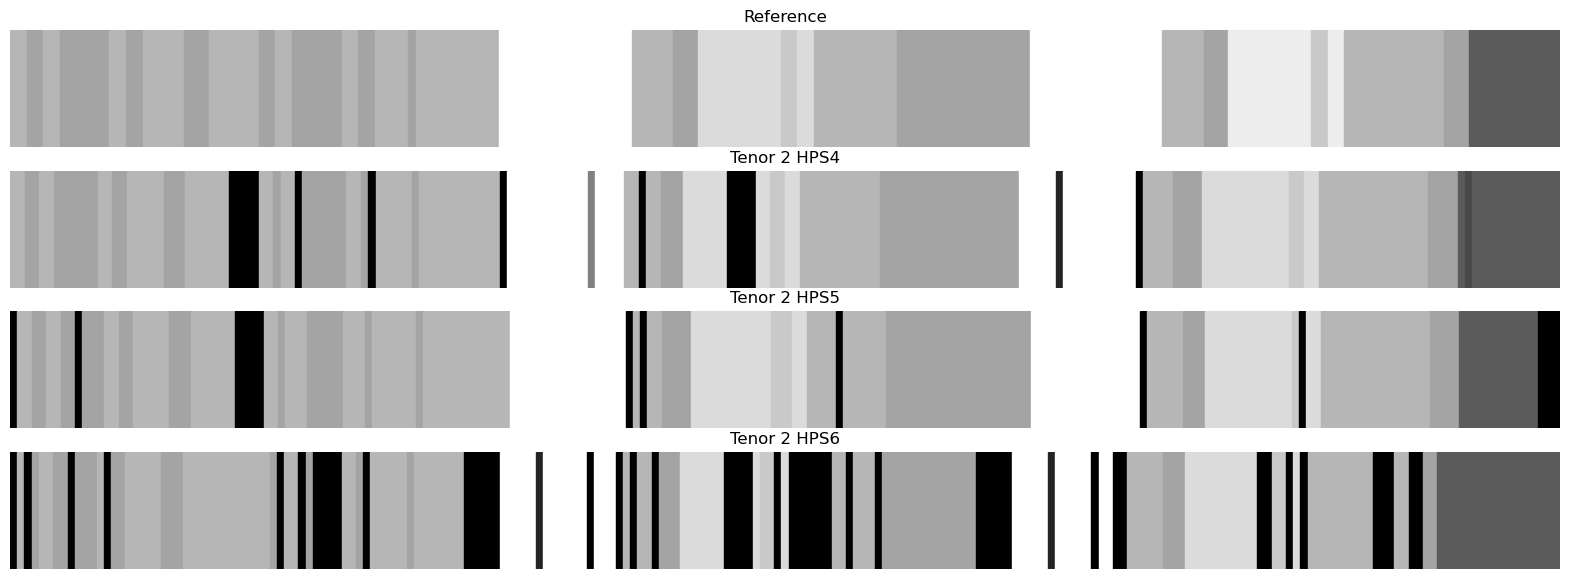

In [4]:
# Second tenor.
series = second_tenor

fig, axes = plt.subplots(len(series), 1, figsize=(20, 7))

for (ax, (key, list)) in zip(axes, series.items()):
    draw_list(list, ax, y_offset=0, rect_height=1, plot_title=key)
    distance, _ = fastdtw(list, series["Reference"], dist=euclidean)
    print(f"{key} error {distance}")


Reference error 0.0
Bass 2 HPS4 error 306.0
Bass 2 HPS5 error 244.0
Bass 2 HPS6 error 283.0


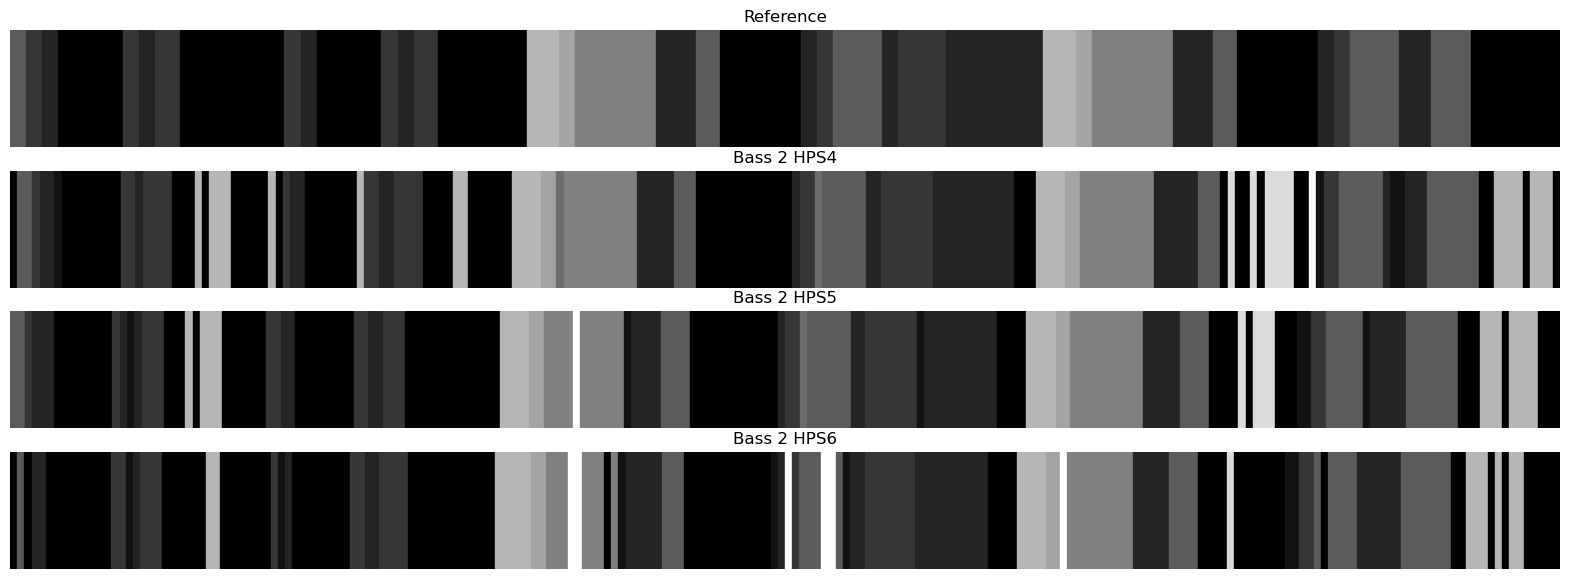

In [5]:
# Second bass.
series = second_bass
fig, axes = plt.subplots(len(series), 1, figsize=(20, 7))

for (ax, (key, list)) in zip(axes, series.items()):
    draw_list(list, ax, y_offset=0, rect_height=1, plot_title=key)
    distance, _ = fastdtw(list, series["Reference"], dist=euclidean)
    print(f"{key} error {distance}")




Reference error 24.0
Bass 1 HPS4 error 261.0
Bass 1 HPS5 error 256.0
Bass 1 HPS6 error 933.0


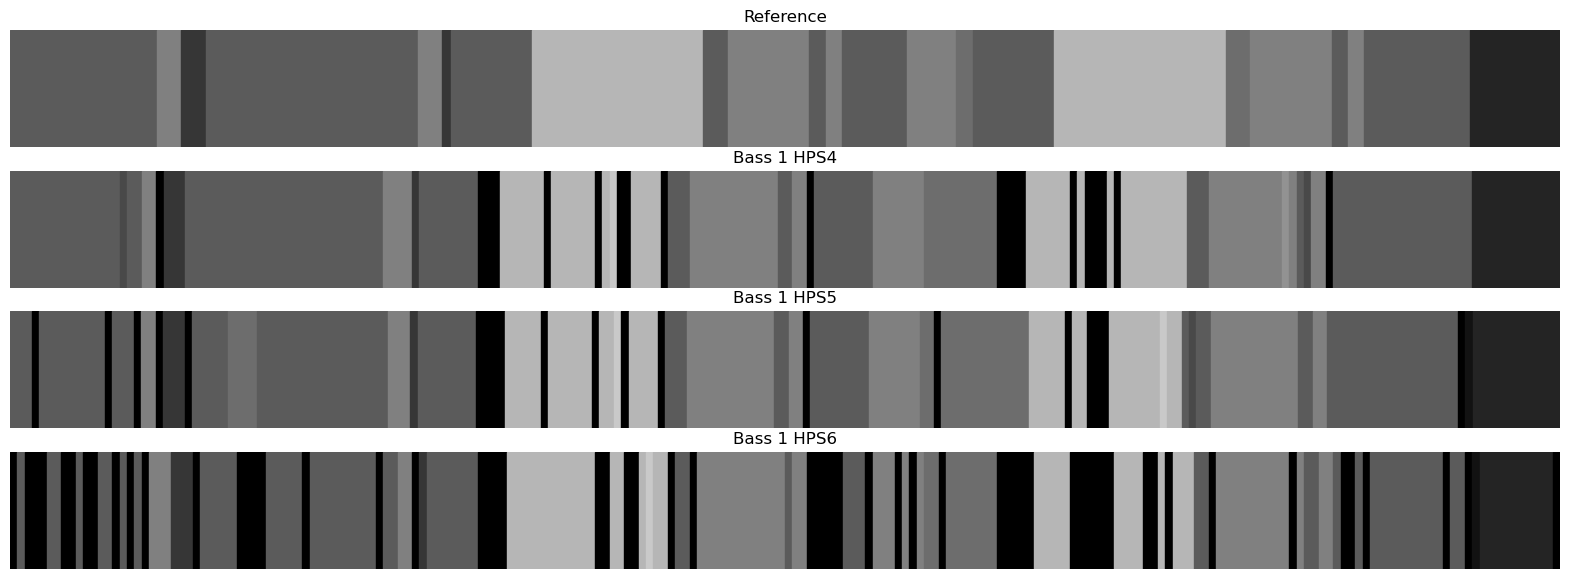

In [6]:
# First bass
series = first_bass

fig, axes = plt.subplots(len(series), 1, figsize=(20, 7))

for (ax, (key, list)) in zip(axes, series.items()):
    draw_list(list, ax, y_offset=0, rect_height=1, plot_title=key)
    distance, _ = fastdtw(list, series["Reference"], dist=euclidean)
    print(f"{key} error {distance}")


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



Text(0.5, 0, ' ')

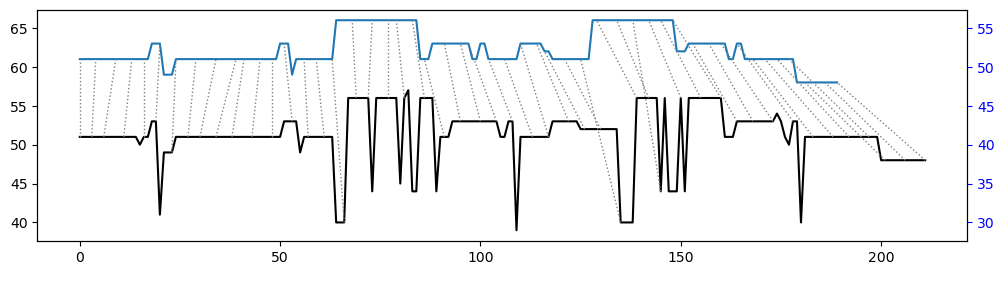

In [7]:

import numpy as np
from dtw import *

## A noisy sine wave as query
# idx = np.linspace(0,6.28,num=100)
# query = [1,1,1,1,1,1,1,5,6,5,1,1,1,6,6,6,6,6,6,3,3,5,3,3,3,3,3,1,1,1,1,1,1,1]
query = first_bass["Bass 1 HPS4"]

## A cosine is for template; sin and cos are offset by 25 samples
# template = [1,2,1,1,5,5,5,5,5,1,6,6,3,3,3,3,3,1,1,1,1,1,1]
template =  first_bass["Reference"]
## Find the best match with the canonical recursion formula
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
# alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion

dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=10)

plt.gcf().set_size_inches(12, 3)
ax = plt.gca()
ax = plt.gcf().get_axes()[0]
ax.set_ylabel("")
ax.set_xlabel(" ")
## See the recursion relation, as formula and diagram
# print(rabinerJuangStepPattern(6,"c"))
# rabinerJuangStepPattern(6,"c").plot()


[147.   8.  15.   5.   1.   2.   0.   0.   2.   1.   1.   1.] 12


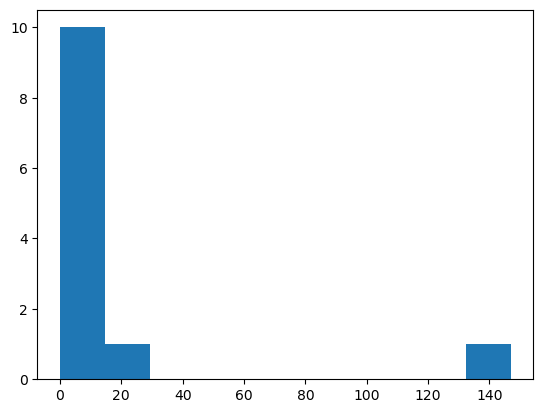

In [8]:
error_series = first_tenor["Tenor 1 HPS4"]


data = np.zeros(12)
for i in range(len(error_series)-1):
    err = abs(error_series[i] - error_series[i+1])
    if(err < 12):
        data[err] += 1

plt.hist(data)
print(data, len(data))

Reference error 8930.0
Bass 1 HPS4 error 9892.0
Bass 1 HPS5 error 9927.0
Bass 1 HPS6 error 9872.0


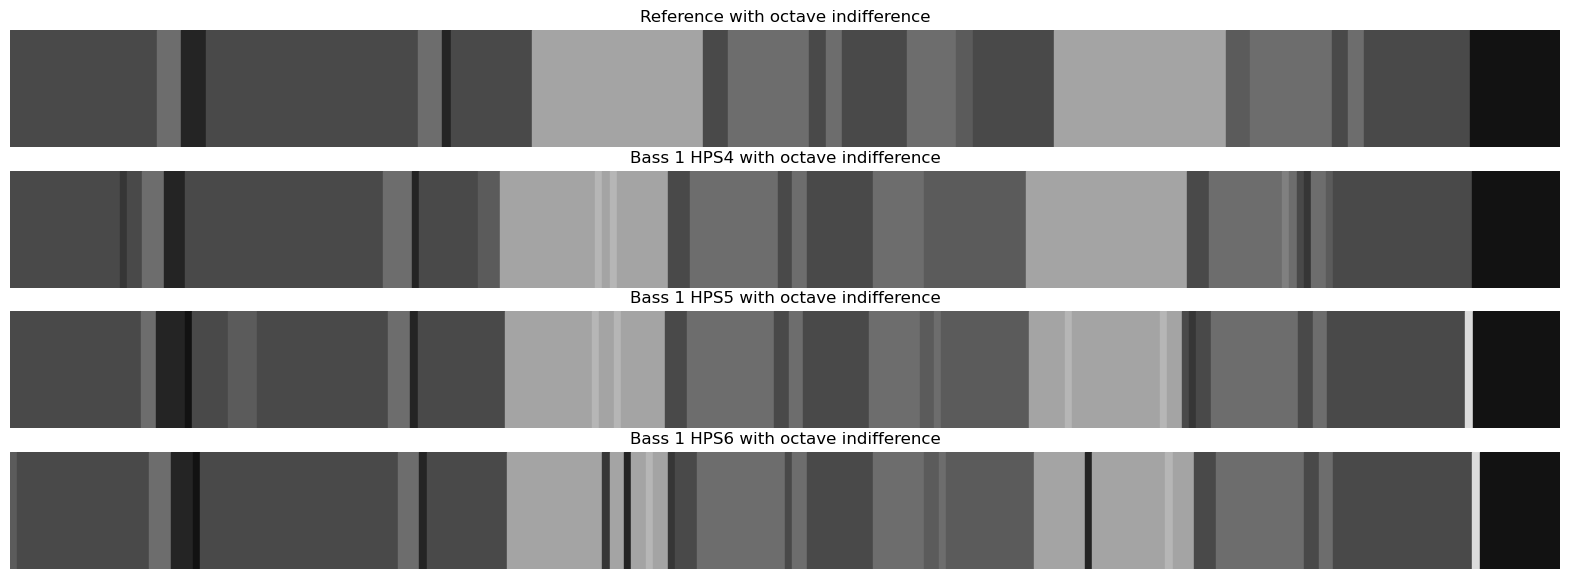

In [12]:
# Mod 12 results
series = first_bass

fig, axes = plt.subplots(len(series), 1, figsize=(20, 7))
mod12ref = [x%12 for x in series["Reference"]]

for (ax, (key, list)) in zip(axes, series.items()):
    mod12list = [(x%12) + 47 for x in list]
    draw_list(mod12list, ax, y_offset=0, rect_height=1, plot_title=f'{key} with octave indifference')
    distance, _ = fastdtw(mod12list, mod12ref, dist=euclidean)
    print(f"{key} error {distance}")